### Задание
#### Необходимо провести базовый EDA выбранного набора данных.

##### Требования к анализу:

 * построить не менее 4 визуализаций различных видов;
 * каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
 * по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('market.csv', sep = '\t', encoding='UTF-16')

###### Базовый EDA 

In [34]:
# пустые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17834 entries, 0 to 17833
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   federal_district  17834 non-null  object 
 1   cyti              17834 non-null  object 
 2   year              17834 non-null  int64  
 3   quarter           17834 non-null  int64  
 4   manufacture       13591 non-null  object 
 5   sku               17834 non-null  object 
 6   amount_unit       7775 non-null   float64
 7   amount_rub        7727 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ MB


в колонках amount_unit b amount_rub содержаться пустые значения, т.к. данные из моей предметной области я могу утверждать, что пустые значения не требуют заполнения и их необходимо удалить


In [49]:
df.drop(df[df.amount_unit.isna()].index, inplace=True)
df.drop(df[df.amount_rub.isna()].index, inplace=True)
df.drop(df[df.year == -4].index, inplace=True)

In [50]:
df.describe()

,year,quarter,amount_unit,amount_rub
count,7722.000000,7722.000000,7722.000000,7.722000e+03
mean,2015.998964,1.454545,1407.399553,8.086354e+05
std,0.032172,0.504936,15524.088275,5.712722e+06
min,2015.000000,1.000000,0.200000,-2.500000e-01
25%,2016.000000,1.000000,6.000000,1.307783e+04
50%,2016.000000,1.000000,24.000000,5.686010e+04
75%,2016.000000,2.000000,106.000000,2.949912e+05
max,2016.000000,4.000000,1000000.000000,2.911241e+08


In [51]:
df.head()

,federal_district,cyti,year,quarter,manufacture,sku,amount_unit,amount_rub
0,ЮФО,"Ростовская обл, Каменск-Шахтинский",2016,1,Рош Диагностикс ГмбХ,"Тест-полоски ""Акку-Чек Актив"" №50",5.0,8753.35
2,ЮФО,"Ростовская обл, Каменск-Шахтинский",2016,1,Диамедикал Лтд (Ай-Чек),Тест-полоски АйЧек №50+ 50 ланц.,10.0,13106.70
3,ЮФО,"Ростовская обл, Каменск-Шахтинский",2016,1,"ООО ""Компания ""ЭЛТА""","Тест-полоски ""Сателлит экспресс"" №50",50.0,44216.50
4,ЮФО,"Ростовская обл, Каменск-Шахтинский",2016,1,NaN,продукция диагностическая,64.0,3234473.69
8,УФО,Тюмень г.,2016,1,NaN,продукция не диабет,30.0,1770950.00


In [55]:
df['year_quarter'] = df['year'] * 100 + df['quarter']

In [61]:
dynamics_by_region = df[[x for x in df.columns if 'amount_rub' in x] + ['year_quarter']] \
    .groupby('year_quarter').sum()
dynamics_by_region

,amount_rub
year_quarter,
201504,9.533475e+05
201601,3.733657e+09
201602,2.509569e+09
201604,1.039800e+05


Text(0, 0.5, 'Продажи, млн.')

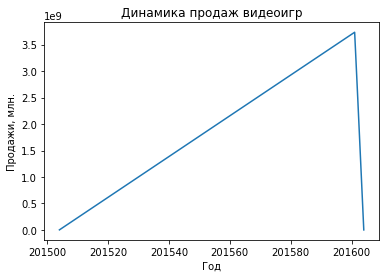

In [62]:
plt.plot(dynamics_by_region.index, dynamics_by_region.amount_rub)
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')